In [14]:
import numpy as np
from scipy.optimize import curve_fit

In [15]:
from scipy.optimize import curve_fit
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
from lmfit import Parameters, minimize, report_fit

In [17]:
# データの読み込み
dataset = pd.read_csv('xy.csv')
x = dataset['x']
y = dataset['y']

In [18]:
# # モデル関数
# def model(x, Kxx, Kyy, Kxy):
#     C = np.cos(np.radians(x))
#     S = np.sin(np.radians(x))
#     k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
#     k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
#     k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
#     return k1, k2, k3

# # フィッティングするための目的関数
# def objective(x, Kxx, Kyy, Kxy):
#     k1, k2, k3 = model(x, Kxx, Kyy, Kxy)
#     return np.concatenate([k1, k2, k3])

# # フィッティング
# params, params_covariance = curve_fit(objective, x, y, p0=[1, 1, 1])

# print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

In [19]:
def gauss(x, amp, cen, sigma):
    """Gaussian lineshape."""
    return amp * np.exp(-(x-cen)**2 / (2.*sigma**2))


def gauss_dataset(params, i, x):
    """Calculate Gaussian lineshape from parameters for data set."""
    amp = params[f'amp_{i+1}']
    cen = params[f'cen_{i+1}']
    sig = params[f'sig_{i+1}']
    return gauss(x, amp, cen, sig)


def objective(params, x, data):
    """Calculate total residual for fits of Gaussians to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - gauss_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

In [20]:
np.random.seed(2021)
x = np.linspace(-1, 2, 151)
data = []
for _ in np.arange(5):
    amp = 0.60 + 9.50*np.random.rand()
    cen = -0.20 + 1.20*np.random.rand()
    sig = 0.25 + 0.03*np.random.rand()
    dat = gauss(x, amp, cen, sig) + np.random.normal(size=x.size, scale=0.1)
    data.append(dat)
data = np.array(data)

In [21]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add(f'amp_{iy+1}', value=0.5, min=0.0, max=200)
    fit_params.add(f'cen_{iy+1}', value=0.4, min=-2.0, max=2.0)
    fit_params.add(f'sig_{iy+1}', value=0.3, min=0.01, max=3.0)

In [22]:
for iy in (2, 3, 4, 5):
    fit_params[f'sig_{iy}'].expr = 'sig_1'

In [23]:
out = minimize(objective, fit_params, args=(x, data))
report_fit(out.params)

[[Variables]]
    amp_1:  6.32742010 +/- 0.02279089 (0.36%) (init = 0.5)
    cen_1:  0.68049261 +/- 0.00126458 (0.19%) (init = 0.4)
    sig_1:  0.25755570 +/- 4.9426e-04 (0.19%) (init = 0.3)
    amp_2:  6.98604753 +/- 0.02296733 (0.33%) (init = 0.5)
    cen_2:  0.50433700 +/- 0.00114536 (0.23%) (init = 0.4)
    sig_2:  0.25755570 +/- 4.9426e-04 (0.19%) == 'sig_1'
    amp_3:  7.11643510 +/- 0.02300415 (0.32%) (init = 0.5)
    cen_3: -0.08260274 +/- 0.00112437 (1.36%) (init = 0.4)
    sig_3:  0.25755570 +/- 4.9426e-04 (0.19%) == 'sig_1'
    amp_4:  6.10197422 +/- 0.02273421 (0.37%) (init = 0.5)
    cen_4:  0.07386098 +/- 0.00131130 (1.78%) (init = 0.4)
    sig_4:  0.25755570 +/- 4.9426e-04 (0.19%) == 'sig_1'
    amp_5:  9.23910555 +/- 0.02368872 (0.26%) (init = 0.5)
    cen_5:  0.34443083 +/- 8.6605e-04 (0.25%) (init = 0.4)
    sig_5:  0.25755570 +/- 4.9426e-04 (0.19%) == 'sig_1'
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_1, amp_5) = -0.3742
    C(sig_1, amp_3) = -0

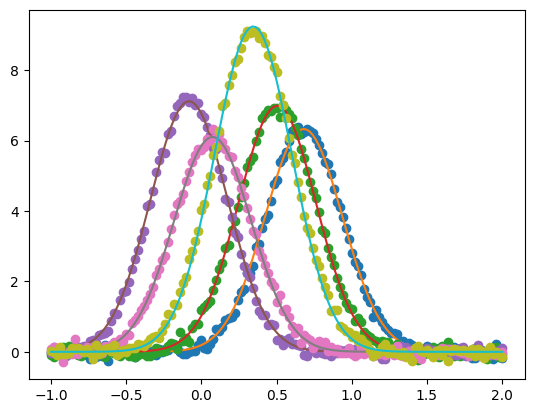

In [24]:
plt.figure()
for i in range(5):
    y_fit = gauss_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')